In [1]:
# Colab notebook env library installation
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

In [3]:
# Read the csv files of the dataset
sales_data_analysis = pd.read_csv("train_merged.csv", parse_dates=['date'])
demand_forecasting = pd.read_csv("demand_forecasting.csv", parse_dates=['date'])
stores = pd.read_csv('stores_updated.csv')
sales_data_analysis = sales_data_analysis.merge(stores, on="Store", how="left")

In [4]:
# Sales Performance Analysis through visualization
df_store_sales = sales_data_analysis.groupby('StoreType').agg({"Sales" : "mean"}).reset_index().sort_values(by='Sales', ascending=False)
df_fam_sales = sales_data_analysis.groupby('ProductFamily').agg({"Sales" : "mean"}).reset_index().sort_values(by='Sales', ascending=False)[:10]
df_clus_sales = sales_data_analysis.groupby('StoreCluster').agg({"Sales" : "mean"}).reset_index()

df_fam_sales.loc[:, 'color'] = '#1E3A8A'
df_fam_sales.loc[3:, 'color'] = '#3B82F6'
df_clus_sales.loc[:, 'color'] = '#60A5FA'

fig = make_subplots(rows=2, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}], [{"colspan": 2}, None]], column_widths=[0.7, 0.3],
                    vertical_spacing=0, horizontal_spacing=0.02, subplot_titles=("Top 10 Highest Product Family Sales in all Stores", "Highest Sales in Stores", "Store Clusters Vs Sales"))

fig.add_trace(go.Bar(x=df_fam_sales['Sales'], y=df_fam_sales['ProductFamily'], marker=dict(color= df_fam_sales['color']), name='Product Family', orientation='h'), row=1, col=1)

fig.add_trace(go.Pie(values=df_store_sales['Sales'], labels=df_store_sales['StoreType'], name='Store type', marker=dict(colors=['#1E3A8A', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD', '#BFDBFE']), hole=0.7, hoverinfo='label+percent+value', textinfo='label'), row=1, col=2)

fig.add_trace(go.Bar(x=df_clus_sales['StoreCluster'], y=df_clus_sales['Sales'],  marker=dict(color= df_clus_sales['color']), name='Store Cluster'), row=2, col=1)

fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode='array', tickvals=df_clus_sales.StoreCluster, ticktext=[i for i in range(1,17)], row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=500, bargap=0.2, margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'), title_text="Sales Performance Analysis",
                  template="plotly_white", title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"), font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"), showlegend=False)

fig.show()
fig.write_image("Sales_Performance_Analysis.png")

In [5]:
# Plot Average Sales Per Year
df_2013 = sales_data_analysis[sales_data_analysis['Year']==2013][['Month','Sales']]
df_2013 = df_2013.groupby('Month').agg({"Sales" : "mean"}).reset_index().rename(columns={'Sales':'s13'})
df_2014 = sales_data_analysis[sales_data_analysis['Year']==2014][['Month','Sales']]
df_2014 = df_2014.groupby('Month').agg({"Sales" : "mean"}).reset_index().rename(columns={'Sales':'s14'})
df_2015 = sales_data_analysis[sales_data_analysis['Year']==2015][['Month','Sales']]
df_2015 = df_2015.groupby('Month').agg({"Sales" : "mean"}).reset_index().rename(columns={'Sales':'s15'})
df_2016 = sales_data_analysis[sales_data_analysis['Year']==2016][['Month','Sales']]
df_2016 = df_2016.groupby('Month').agg({"Sales" : "mean"}).reset_index().rename(columns={'Sales':'s16'})
df_2017 = sales_data_analysis[sales_data_analysis['Year']==2017][['Month','Sales']]
df_2017 = df_2017.groupby('Month').agg({"Sales" : "mean"}).reset_index()
df_2017_no = pd.DataFrame({'Month': [9,10,11,12], 'Sales':[0,0,0,0]})
df_2017 = pd.concat([df_2017, df_2017_no], ignore_index=True).rename(columns={'Sales': 's17'})
df_year = df_2013.merge(df_2014,on='Month').merge(df_2015,on='Month').merge(df_2016,on='Month').merge(df_2017,on='Month')

top_labels = ['2013', '2014', '2015', '2016', '2017']
colors = ['#1E3A8A', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD']

df_year = df_year[['s13','s14','s15','s16','s17']].replace(np.nan,0)
x_data = df_year.values

df_2013['month'] =['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2013['month'].tolist()

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(x=[xd[i]], y=[yd], orientation='h', marker=dict( color=colors[i], line=dict(color='rgb(248, 248, 249)', width=1))))

fig.update_layout(title='Avg Sales for each Year', xaxis=dict(showgrid=False, zeroline=False, domain=[0.15, 1]),
                  yaxis=dict(showgrid=False, showline=False, showticklabels=False, zeroline=False), barmode='stack',
                  plot_bgcolor='#fff', paper_bgcolor='#fff', margin=dict(l=0, r=50, t=100, b=10), showlegend=False,)

annotations = []
for yd, xd in zip(y_data, x_data):
    annotations.append(dict(xref='paper', yref='y', x=0.14, y=yd, xanchor='right', text=str(yd),
                            font=dict(family='verdana', size=16, color='rgb(67, 67, 67)'), showarrow=False, align='right'))

    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper', x=xd[0] / 2, y=1.1, text=top_labels[0],
                                font=dict(family='verdana ', size=16, color='rgb(67, 67, 67)'), showarrow=False))

    space = xd[0]
    for i in range(1, len(xd)):
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper', x=space + (xd[i]/2), y=1.1, text=top_labels[i],
                                        font=dict(family='verdana ', size=16, color='rgb(67, 67, 67)'), showarrow=False))
            space += xd[i]

fig.update_layout(
    annotations=annotations)
fig.show()
fig.write_image("Avarage_Sales_Year.png")

In [6]:
# Time series decomposition; Sales Trend Analysis through visualization
time_series = sales_data_analysis.groupby(['date'])['Sales'].agg(
    ['sum']).reset_index().rename(columns={'sum': 'Sales'})
time_series = time_series.set_index('date')
time_series = time_series['Sales'].resample('MS').mean()

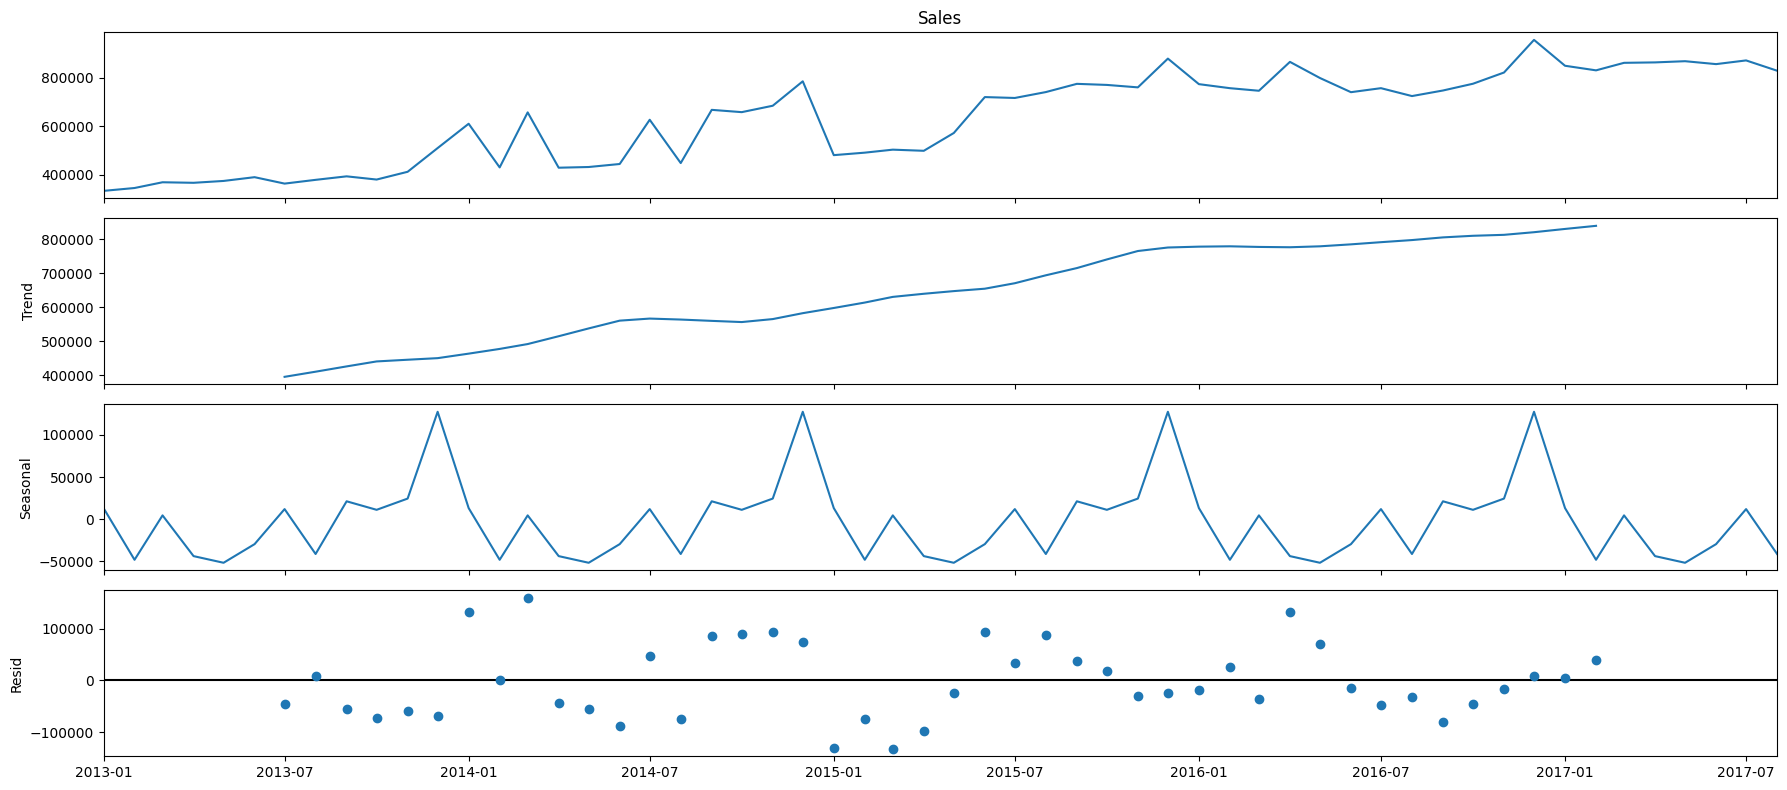

In [7]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

fig = decomposition.plot()
fig.show()
fig.savefig("Sales_Trend_Analysis.png", dpi=300, bbox_inches='tight')

In [8]:
print("=== PER-STORE ANALYSIS ===")
# Calculate KPIs per store
def calculate_store_kpis(sales_data):
    """Calculate various KPIs for each store"""
    store_kpis = []

    for store_id in sales_data['Store'].unique():
        store_data = sales_data[sales_data['Store'] == store_id]

        # Basic metrics
        total_sales = store_data['Sales'].sum()
        avg_daily_sales = store_data['Sales'].mean()
        sales_volatility = store_data['Sales'].std()
        coefficient_of_variation = sales_volatility / avg_daily_sales if avg_daily_sales > 0 else 0

        # Sales growth metrics
        store_data_sorted = store_data.sort_values('date')
        first_half = store_data_sorted.iloc[:len(store_data_sorted)//2]['Sales'].mean()
        second_half = store_data_sorted.iloc[len(store_data_sorted)//2:]['Sales'].mean()
        growth_rate = ((second_half - first_half) / first_half * 100) if first_half > 0 else 0

        # Product diversity
        unique_products = store_data['ProductFamily'].nunique()

        # Store characteristics
        store_type = store_data['StoreType'].iloc[0]
        store_cluster = store_data['StoreCluster'].iloc[0]
        city = store_data['City'].iloc[0]
        state = store_data['State'].iloc[0]

        store_kpis.append({
            'Store': store_id,
            'StoreType': store_type,
            'StoreCluster': store_cluster,
            'City': city,
            'State': state,
            'TotalSales': total_sales,
            'AvgDailySales': avg_daily_sales,
            'SalesVolatility': sales_volatility,
            'CoefficientOfVariation': coefficient_of_variation,
            'GrowthRate': growth_rate,
            'ProductDiversity': unique_products
        })

    return pd.DataFrame(store_kpis)

=== PER-STORE ANALYSIS ===


In [9]:
store_kpis = calculate_store_kpis(sales_data_analysis)

In [10]:
# Display top and bottom performing stores
print("\nTop 10 Stores by Total Sales:")
print(store_kpis.nlargest(10, 'TotalSales')[['Store', 'City', 'StoreType', 'TotalSales', 'AvgDailySales']])


Top 10 Stores by Total Sales:
    Store       City StoreType    TotalSales  AvgDailySales
43     44      Quito         A  6.208754e+07    1114.597592
44     45      Quito         A  5.449801e+07     978.350036
46     47      Quito         A  5.094831e+07     914.625665
2       3      Quito         D  5.048190e+07     906.252678
48     49      Quito         A  4.342009e+07     779.478849
45     46      Quito         A  4.189605e+07     752.119258
47     48      Quito         A  3.593313e+07     645.072711
50     51  Guayaquil         A  3.291148e+07     590.828029
7       8      Quito         D  3.049134e+07     547.381443
49     50     Ambato         A  2.865302e+07     514.379912


In [11]:
print("\nTop 10 Stores by Growth Rate:")
print(store_kpis.nlargest(10, 'GrowthRate')[['Store', 'City', 'StoreType', 'GrowthRate', 'AvgDailySales']])


Top 10 Stores by Growth Rate:
    Store       City StoreType   GrowthRate  AvgDailySales
28     29  Guayaquil         E  2993.941125     174.550440
19     20      Quito         B  1521.878602     231.957375
52     53      Manta         D   377.820185     201.150802
48     49      Quito         A    99.377190     779.478849
35     36   Libertad         E    91.146477     275.068650
39     40    Machala         C    79.975407     330.241229
16     17      Quito         C    77.949941     323.692522
40     41    Machala         D    77.598187     269.119024
27     28  Guayaquil         E    70.345302     330.014969
6       7      Quito         D    69.435052     483.843541


In [12]:
print("\nMost Volatile Stores (High Risk):")
print(store_kpis.nlargest(10, 'CoefficientOfVariation')[['Store', 'City', 'StoreType', 'CoefficientOfVariation', 'SalesVolatility']])


Most Volatile Stores (High Risk):
    Store           City StoreType  CoefficientOfVariation  SalesVolatility
51     52          Manta         A                9.268045       448.589386
21     22           Puyo         C                4.301808       315.870722
19     20          Quito         B                4.160578       965.076793
20     21  Santo Domingo         B                3.915405       650.564132
41     42         Cuenca         D                3.629502       582.878895
28     29      Guayaquil         E                3.478418       607.159384
34     35         Playas         C                3.407521       469.597147
31     32      Guayaquil         C                3.122692       333.649095
25     26      Guayaquil         D                3.016293       419.927958
52     53          Manta         D                2.986265       600.689555


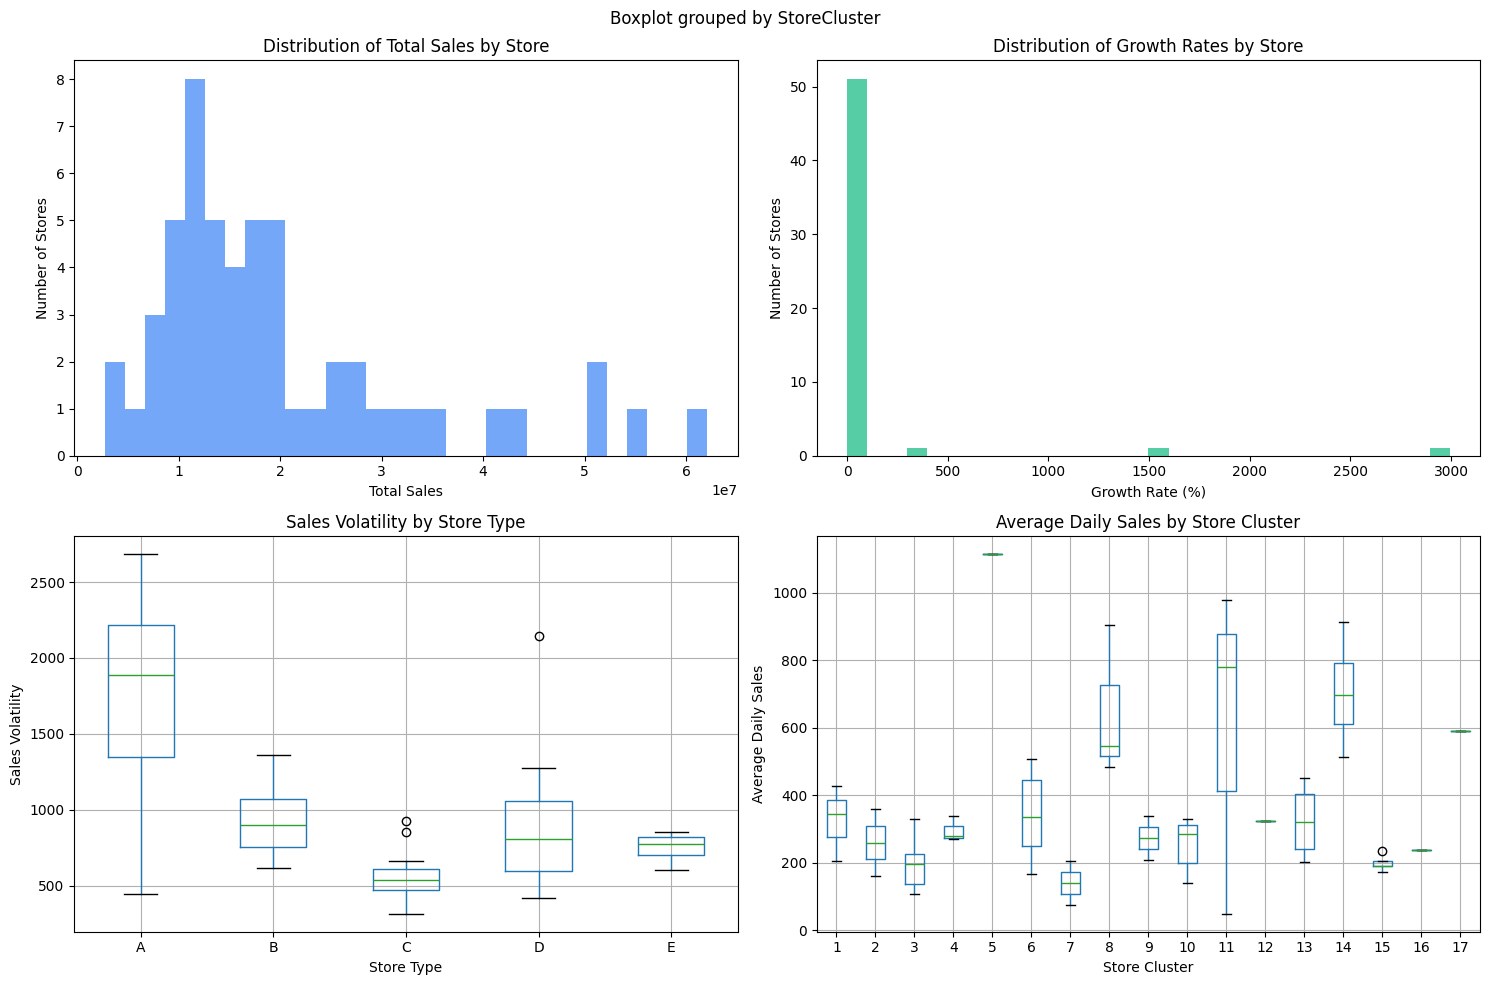

In [13]:
# Visualize store performance distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Total Sales Distribution
axes[0,0].hist(store_kpis['TotalSales'], bins=30, alpha=0.7, color='#3B82F6')
axes[0,0].set_title('Distribution of Total Sales by Store')
axes[0,0].set_xlabel('Total Sales')
axes[0,0].set_ylabel('Number of Stores')

# Growth Rate Distribution
axes[0,1].hist(store_kpis['GrowthRate'], bins=30, alpha=0.7, color='#10B981')
axes[0,1].set_title('Distribution of Growth Rates by Store')
axes[0,1].set_xlabel('Growth Rate (%)')
axes[0,1].set_ylabel('Number of Stores')

# Sales Volatility by Store Type
store_kpis.boxplot(column='SalesVolatility', by='StoreType', ax=axes[1,0])
axes[1,0].set_title('Sales Volatility by Store Type')
axes[1,0].set_xlabel('Store Type')
axes[1,0].set_ylabel('Sales Volatility')

# Average Daily Sales by Store Cluster
store_kpis.boxplot(column='AvgDailySales', by='StoreCluster', ax=axes[1,1])
axes[1,1].set_title('Average Daily Sales by Store Cluster')
axes[1,1].set_xlabel('Store Cluster')
axes[1,1].set_ylabel('Average Daily Sales')

plt.tight_layout()
plt.savefig("Store_Performance_KPIs.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
print("\n=== FORECAST vs HISTORICAL COMPARISON ===")

# Calculate historical baseline for comparison
def calculate_historical_baseline(sales_data, forecast_data):
    """Calculate historical sales baseline for comparison with forecasts"""

    # Get store-level totals instead of product-level
    store_forecast_summary = []

    for store_id in forecast_data['Store'].unique():
        store_forecast = forecast_data[forecast_data['Store'] == store_id]
        store_historical = sales_data[sales_data['Store'] == store_id]

        if len(store_historical) > 0:
            # Get last 16 days of historical data for this store (all products combined)
            last_16_days_data = store_historical.nlargest(16, 'date')
            historical_total = last_16_days_data['Sales'].sum()

            # Get total forecast for this store (all products combined)
            forecast_total = store_forecast['Demand'].sum()

            # Calculate percentage change based on total sales
            if historical_total > 0:
                pct_change = ((forecast_total - historical_total) / historical_total) * 100
            else:
                pct_change = 0

            store_forecast_summary.append({
                'Store': store_id,
                'HistoricalSales': historical_total,
                'ForecastDemand': forecast_total,
                'PercentageChange': pct_change,
                'OverallDirection': 'Growth' if pct_change > 5 else 'Decline' if pct_change < -5 else 'Stable'
            })

    return pd.DataFrame(store_forecast_summary)


=== FORECAST vs HISTORICAL COMPARISON ===


In [19]:
# Calculate store-level comparison
store_forecast_summary = calculate_historical_baseline(sales_data_analysis, demand_forecasting)

# Merge with store information
store_forecast_summary = store_forecast_summary.merge(
    sales_data_analysis[['Store', 'StoreType', 'StoreCluster', 'City', 'State']].drop_duplicates(),
    on='Store'
)

In [20]:
# Filter stores by direction
growth_stores = store_forecast_summary[store_forecast_summary['OverallDirection'] == 'Growth']
decline_stores = store_forecast_summary[store_forecast_summary['OverallDirection'] == 'Decline']
stable_stores = store_forecast_summary[store_forecast_summary['OverallDirection'] == 'Stable']

print(f"\nSummary:")
print(f"Total Stores: {len(store_forecast_summary)}")
print(f"Growth Stores: {len(growth_stores)}")
print(f"Decline Stores: {len(decline_stores)}")
print(f"Stable Stores: {len(stable_stores)}")


Summary:
Total Stores: 54
Growth Stores: 54
Decline Stores: 0
Stable Stores: 0


In [21]:
print("\nStores with Highest Expected Growth:")
if not growth_stores.empty:
    print(growth_stores.nlargest(5, 'PercentageChange')[['Store', 'City', 'StoreType', 'PercentageChange', 'OverallDirection']])
else:
    print("None")

print("\nStores with Expected Decline:")
if not decline_stores.empty:
    print(decline_stores.nsmallest(5, 'PercentageChange')[['Store', 'City', 'StoreType', 'PercentageChange', 'OverallDirection']])
else:
    print("None")

print("\nStores Expected to Remain Stable:")
if not stable_stores.empty:
    print(stable_stores.head(5)[['Store', 'City', 'StoreType', 'PercentageChange', 'OverallDirection']])
else:
    print("None")


Stores with Highest Expected Growth:
    Store           City StoreType  PercentageChange OverallDirection
24     25        Salinas         D      14369.935469           Growth
9      10          Quito         C      10302.614454           Growth
21     22           Puyo         C       9021.050655           Growth
15     16  Santo Domingo         C       8838.149175           Growth
12     13      Latacunga         C       8812.600847           Growth

Stores with Expected Decline:
None

Stores Expected to Remain Stable:
None


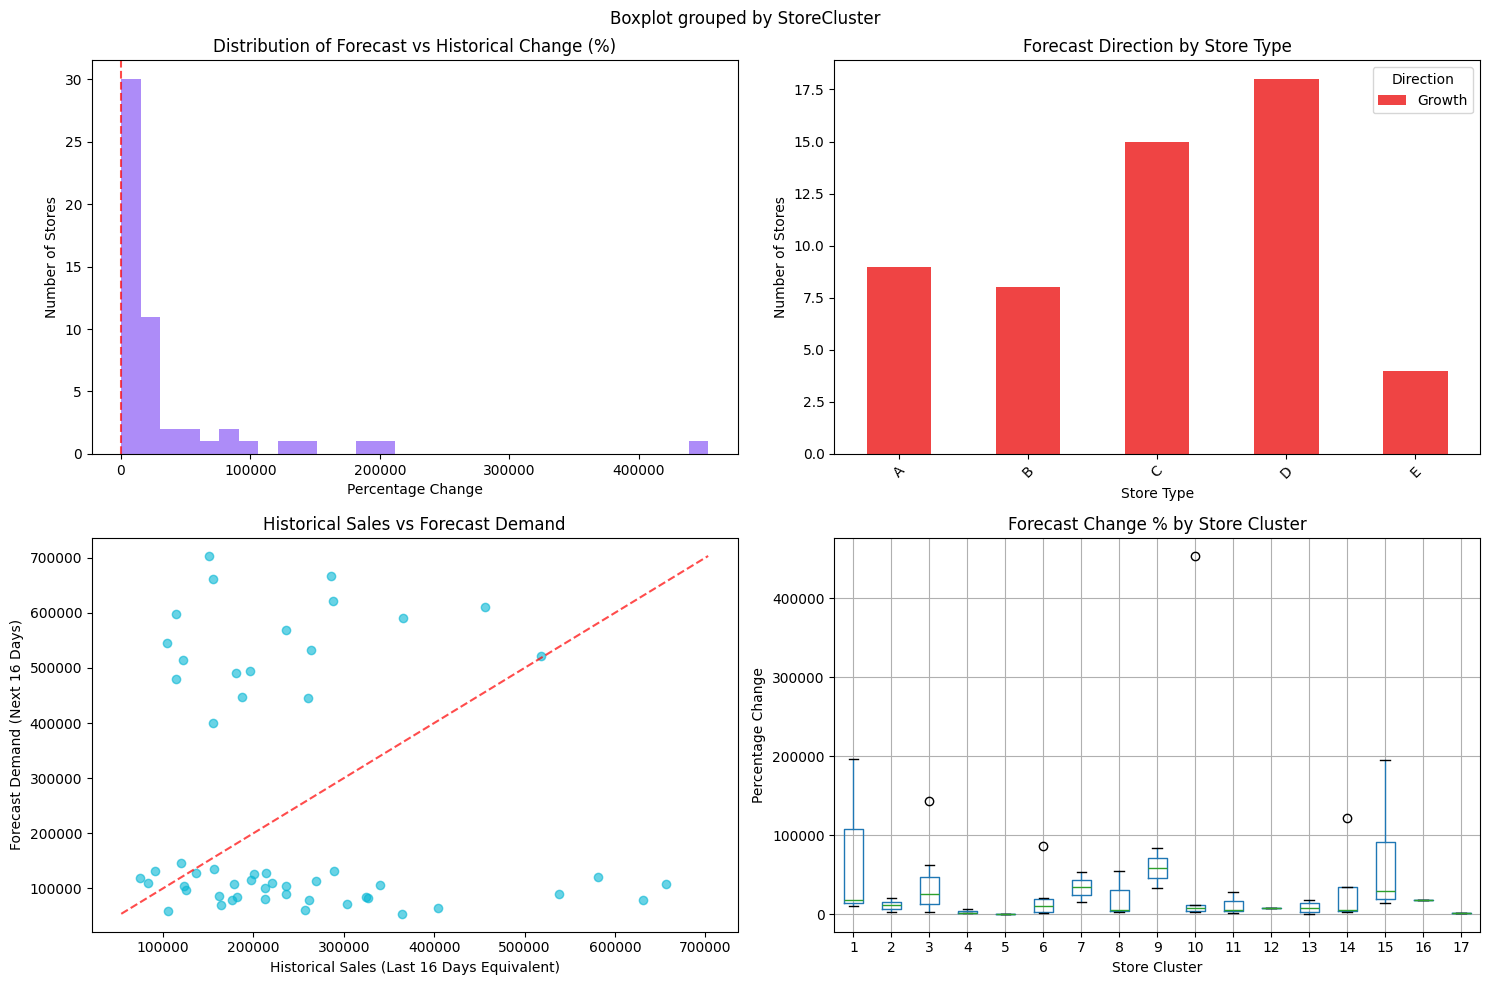

In [21]:
# Visualization of forecast vs historical comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of percentage changes
axes[0,0].hist(store_forecast_summary['PercentageChange'], bins=30, alpha=0.7, color='#8B5CF6')
axes[0,0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[0,0].set_title('Distribution of Forecast vs Historical Change (%)')
axes[0,0].set_xlabel('Percentage Change')
axes[0,0].set_ylabel('Number of Stores')

# Forecast direction by store type
direction_by_type = store_forecast_summary.groupby(['StoreType', 'OverallDirection']).size().unstack(fill_value=0)
direction_by_type.plot(kind='bar', ax=axes[0,1], color=['#EF4444', '#10B981', '#F59E0B'])
axes[0,1].set_title('Forecast Direction by Store Type')
axes[0,1].set_xlabel('Store Type')
axes[0,1].set_ylabel('Number of Stores')
axes[0,1].legend(title='Direction')
axes[0,1].tick_params(axis='x', rotation=45)

# Scatter plot: Historical vs Forecast
axes[1,0].scatter(store_forecast_summary['HistoricalSales'], store_forecast_summary['ForecastDemand'],
                  alpha=0.6, color='#06B6D4')
min_val = min(store_forecast_summary['HistoricalSales'].min(), store_forecast_summary['ForecastDemand'].min())
max_val = max(store_forecast_summary['HistoricalSales'].max(), store_forecast_summary['ForecastDemand'].max())
axes[1,0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7)
axes[1,0].set_title('Historical Sales vs Forecast Demand')
axes[1,0].set_xlabel('Historical Sales (Last 16 Days Equivalent)')
axes[1,0].set_ylabel('Forecast Demand (Next 16 Days)')

# Percentage change by store cluster
store_forecast_summary.boxplot(column='PercentageChange', by='StoreCluster', ax=axes[1,1])
axes[1,1].set_title('Forecast Change % by Store Cluster')
axes[1,1].set_xlabel('Store Cluster')
axes[1,1].set_ylabel('Percentage Change')

plt.tight_layout()
plt.savefig("Forecast_vs_Historical_Analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Summary statistics
print(f"\n=== SUMMARY STATISTICS ===")
print(f"Total Stores Analyzed: {len(store_forecast_summary)}")
print(f"Stores Expected to Grow: {len(store_forecast_summary[store_forecast_summary['OverallDirection'] == 'Growth'])}")
print(f"Stores Expected to Decline: {len(store_forecast_summary[store_forecast_summary['OverallDirection'] == 'Decline'])}")
print(f"Stores Expected to Remain Stable: {len(store_forecast_summary[store_forecast_summary['OverallDirection'] == 'Stable'])}")
print(f"Average Expected Change: {store_forecast_summary['PercentageChange'].mean():.2f}%")
print(f"Median Expected Change: {store_forecast_summary['PercentageChange'].median():.2f}%")


=== SUMMARY STATISTICS ===
Total Stores Analyzed: 54
Stores Expected to Grow: 54
Stores Expected to Decline: 0
Stores Expected to Remain Stable: 0
Average Expected Change: 36726.61%
Median Expected Change: 12134.15%
